**IMPORTAR LIBRERIAS**
==================================================

In [1]:
#Importar librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
import pywt
import pywt.data

**IMAGEN & FRECUENCIA**
==================================================

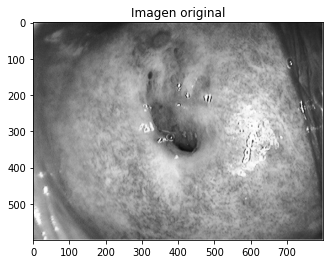

In [2]:
X = cv2.imread("AAAW1.jpg", 0)
plt.imshow(X, "gray"), plt.title("Imagen original")
plt.savefig("img1.pdf")
plt.show()

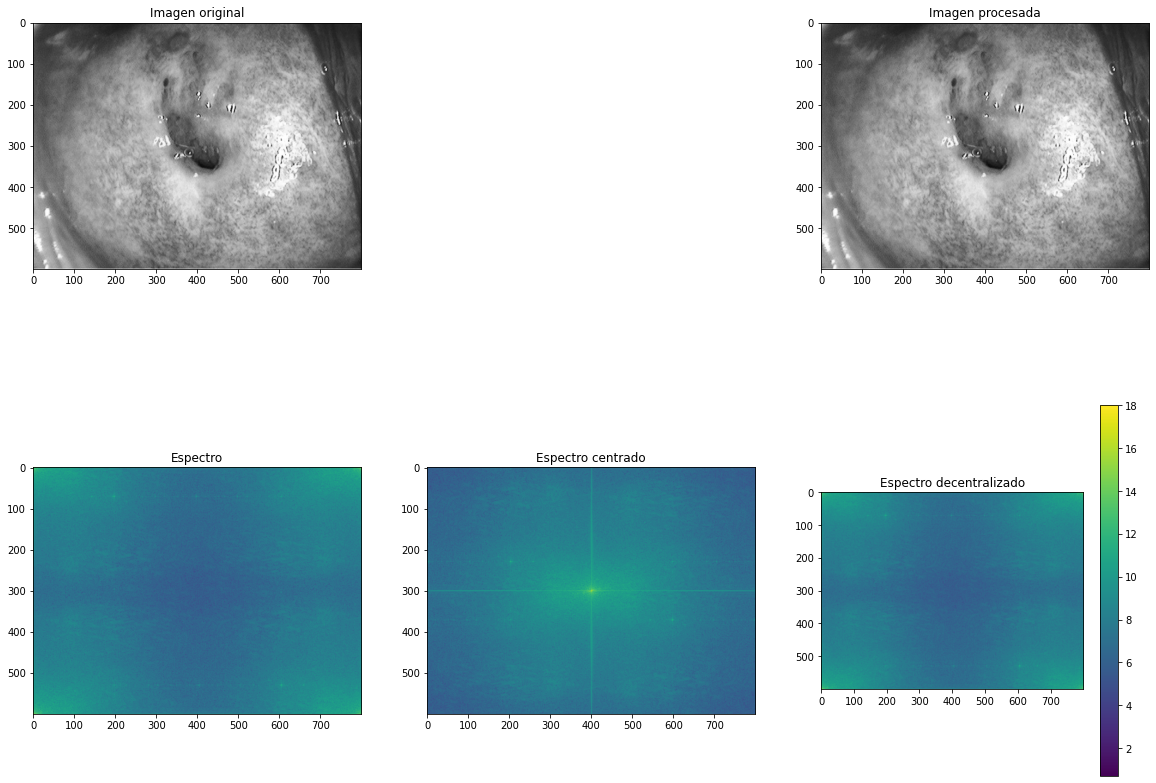

In [3]:
#Transformada de Fourier 2D

plt.figure(figsize=(20,15))

plt.subplot(231), plt.imshow(X, "gray"), plt.title("Imagen original")

X_ft = fft2(X)
plt.subplot(234), plt.imshow(np.log(1+np.abs(X_ft))), plt.title("Espectro")

X_ftc = fftshift(X_ft)
plt.subplot(235), plt.imshow(np.log(1+np.abs(X_ftc))), plt.title("Espectro centrado")

X_ft_inv = ifftshift(X_ftc)
plt.subplot(236), plt.imshow(np.log(1+np.abs(X_ft_inv))), plt.title("Espectro decentralizado"), plt.colorbar()

X_new = ifft2(X_ft_inv)
plt.subplot(233), plt.imshow(np.abs(X_new), "gray"), plt.title("Imagen procesada")

plt.savefig("fourier1.pdf")
plt.show()

**FILTROS**
===============================================================================

In [4]:
#Filtros

Do = 50  #Frecuencia de corte

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

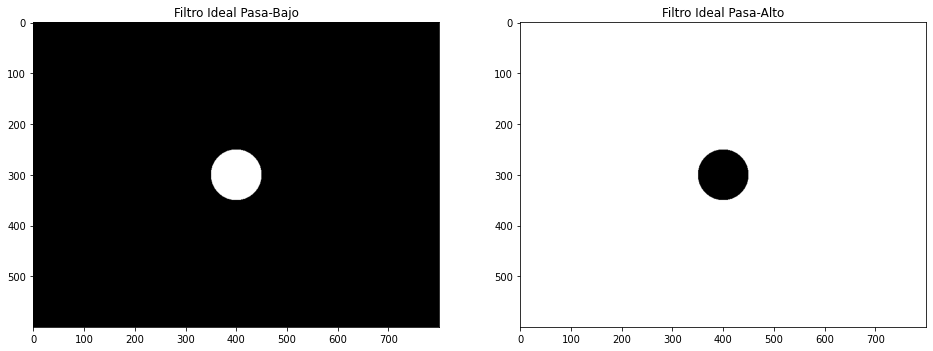

In [5]:
#Filtro Ideal

plt.figure(figsize=(16,15))

LowPass = idealFilterLP(Do,X.shape)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Filtro Ideal Pasa-Bajo")

HighPass = idealFilterHP(Do,X.shape)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Filtro Ideal Pasa-Alto")

plt.savefig("ideal.pdf")
plt.show()

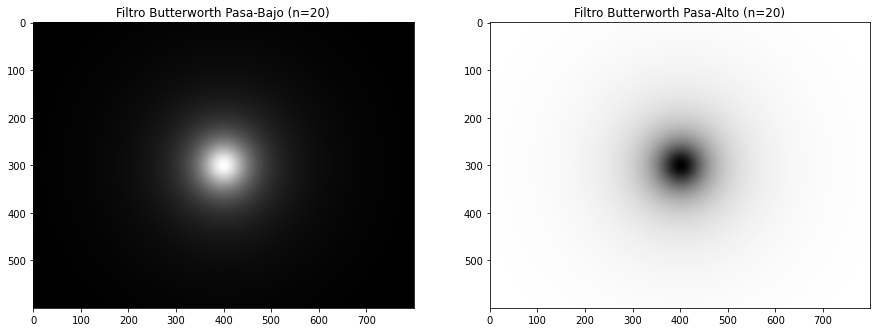

In [6]:
#Fittro Butterworth

plt.figure(figsize=(15,15))

n = 1

LowPass = butterworthLP(Do,X.shape,n)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Filtro Butterworth Pasa-Bajo (n=20)")

HighPass = butterworthHP(Do,X.shape,n)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Filtro Butterworth Pasa-Alto (n=20)")

plt.savefig("butter.pdf")
plt.show()

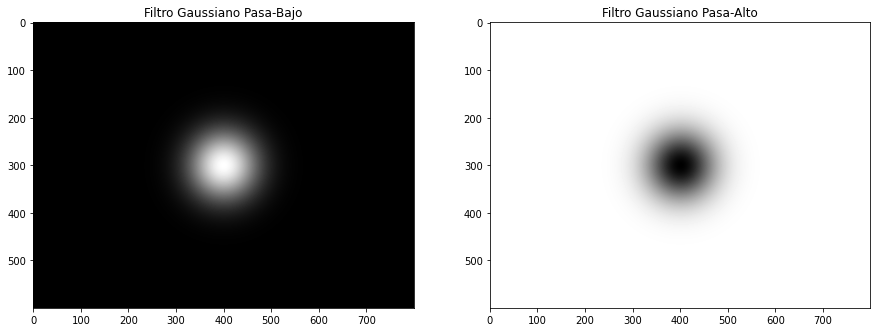

In [7]:
#Filtro Gaussiano

plt.figure(figsize=(15,15))

LowPass = gaussianLP(Do,X.shape)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Filtro Gaussiano Pasa-Bajo")

HighPass = gaussianHP(Do,X.shape)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Filtro Gaussiano Pasa-Alto")

plt.savefig("gauss.pdf")
plt.show()

**PROCESO DE FILTRADO**
===============================================================================

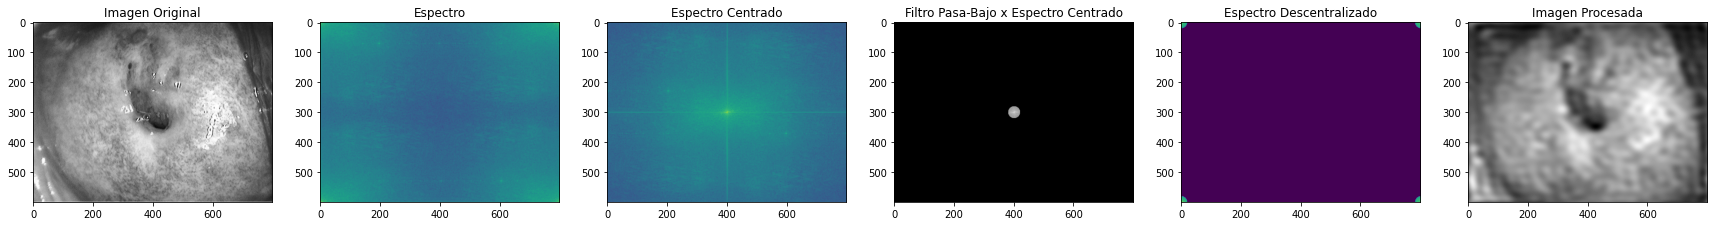

In [8]:
Do     = 20 # frecuencia de corte

plt.figure(figsize=(30,15))

img = X
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Imagen Original")

original = fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original))), plt.title("Espectro")

center = fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center))), plt.title("Espectro Centrado")

LowPassCenter = center * idealFilterLP(Do,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Filtro Pasa-Bajo x Espectro Centrado")

LowPass = ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass))), plt.title("Espectro Descentralizado")

inverse_LowPass = ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Imagen Procesada")

plt.savefig("proceso.pdf")
plt.show()

**ELIMINAR RUIDO**
===============================================================================

In [9]:
def ruidoDelete(X): 
  Do     = 40 # frecuencia de corte

  img = X
  original = fft2(img)
  center = fftshift(original)

  plt.figure(figsize=(30,20))

  LowPassCenter = center * idealFilterLP(Do,img.shape)
  LowPass = ifftshift(LowPassCenter)
  inverse_LowPass = ifft2(LowPass)
  plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Filtro Ideal Pasa-Bajo")

  LowPassCenter = center * butterworthLP(Do,img.shape,n)
  LowPass = ifftshift(LowPassCenter)
  inverse_LowPass = ifft2(LowPass)
  plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Filtro Butterworth Pasa-Bajo (n="+str(n)+")")

  LowPassCenter = center * gaussianLP(Do,img.shape)
  LowPass = ifftshift(LowPassCenter)
  inverse_LowPass = ifft2(LowPass)
  plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Filtro Gaussian Pasa-Bajo")

  plt.savefig("filtroPL.pdf")
  plt.show()

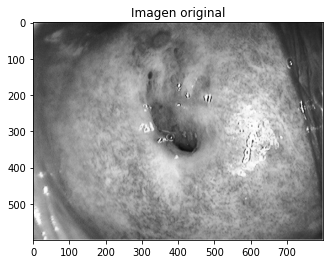

In [10]:
X = cv2.imread("AAAW1.jpg", 0)
plt.imshow(X, "gray"), plt.title("Imagen original")
plt.savefig("img2.pdf")
plt.show()

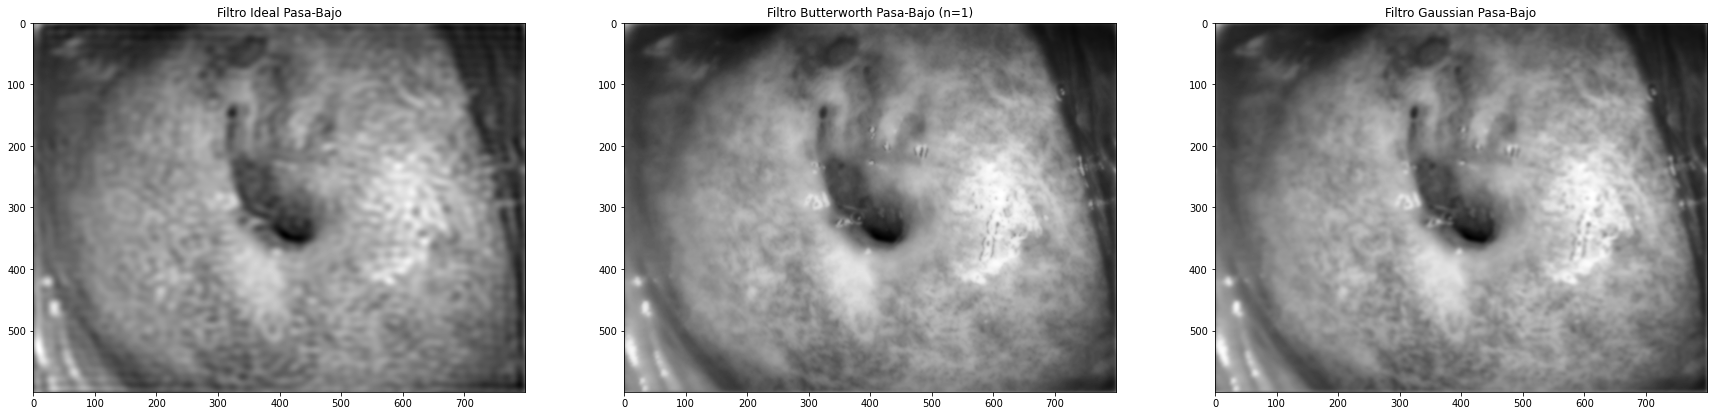

In [11]:
ruidoDelete(X)

**DETECTAR BORDES**
===============================================================================

In [12]:
def bordesDetect(X):
  img = X
  original = fft2(img)
  center = fftshift(original)
  Do = 20
  th = 20
  plt.figure(figsize=(30,20))

  HighPassCenter = center * idealFilterHP(Do,img.shape)
  HighPass = ifftshift(HighPassCenter)
  inverse_HighPass = ifft2(HighPass)
  plt.subplot(131), plt.imshow(np.abs(inverse_HighPass)>th, "gray"), plt.title("Filtro Ideal Pasa-Alto")

  HighPassCenter = center * butterworthHP(Do,img.shape,10)
  HighPass = ifftshift(HighPassCenter)
  inverse_HighPass = ifft2(HighPass)
  plt.subplot(132), plt.imshow(np.abs(inverse_HighPass)>th, "gray"), plt.title("Filtro Butterworth Pasa-Alto ("+str(n)+")")

  HighPassCenter = center * gaussianHP(Do,img.shape)
  HighPass = ifftshift(HighPassCenter)
  inverse_HighPass = ifft2(HighPass)
  plt.subplot(133), plt.imshow(np.abs(inverse_HighPass)>th, "gray"), plt.title("Filtro Gaussian Pasa-Alto")

  plt.savefig("filtroHP.pdf")
  plt.show()

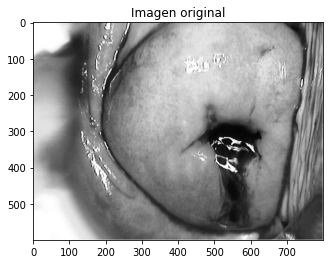

In [13]:
X = cv2.imread("AADG1.jpg", 0)
plt.imshow(X, "gray"), plt.title("Imagen original")
plt.savefig("img3.pdf")
plt.show()

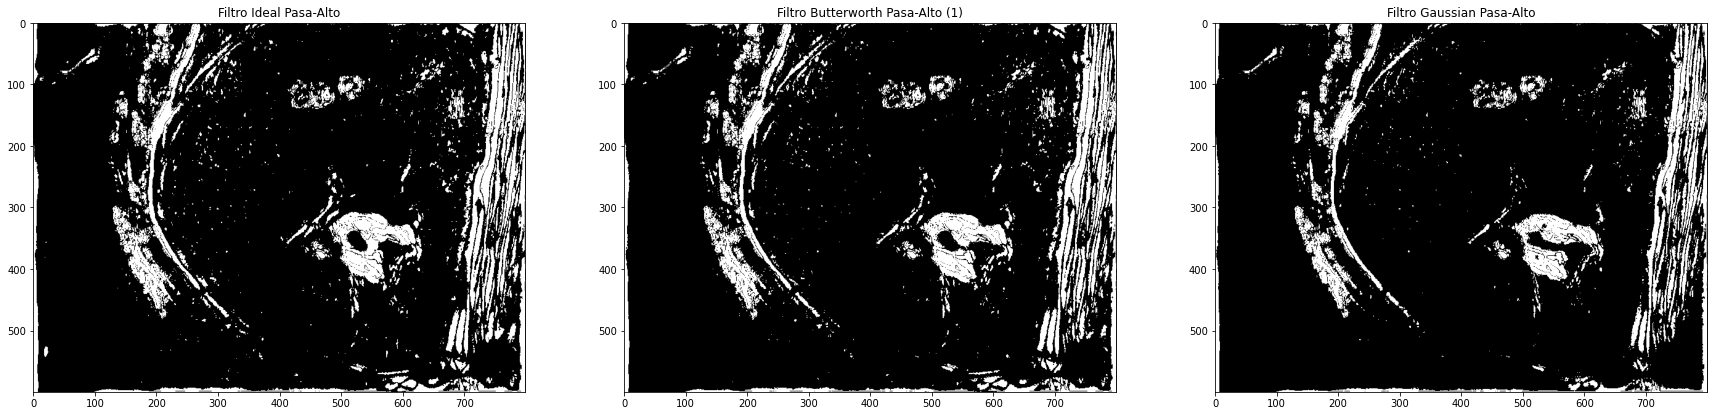

In [14]:
bordesDetect(X)

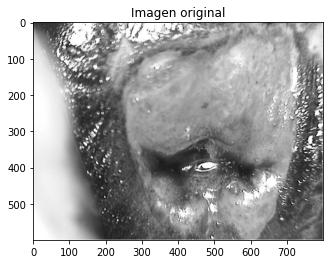

In [15]:
X = cv2.imread("AAGP7.jpg", 0)
plt.imshow(X, "gray"), plt.title("Imagen original")
plt.savefig("img4.pdf")
plt.show()

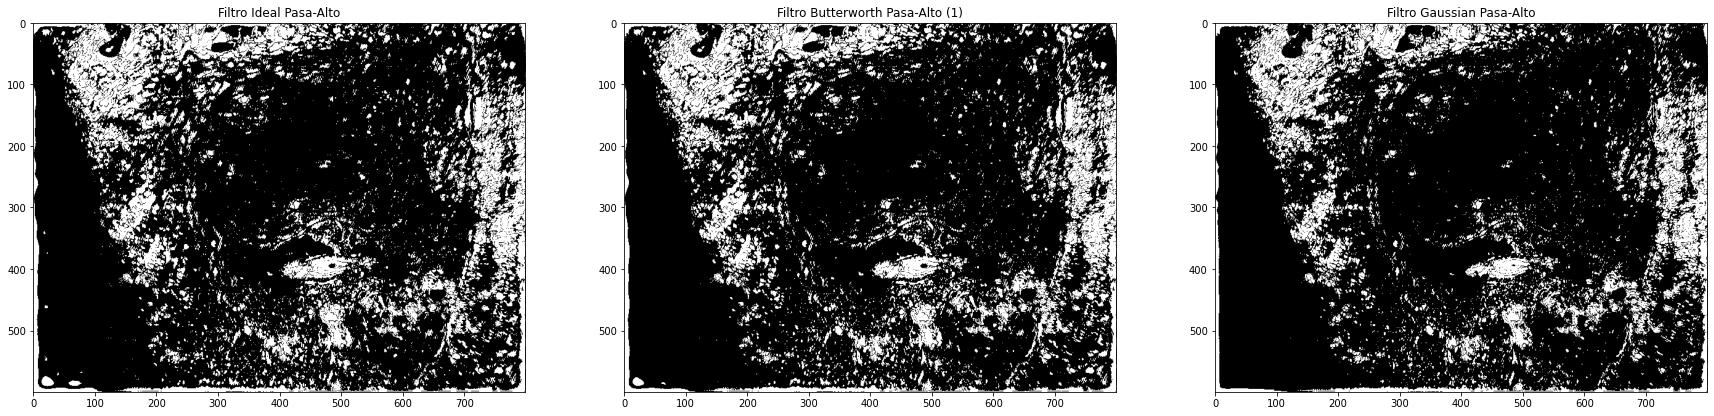

In [16]:
bordesDetect(X)

**WAVELET: EXTRAER CARACTERISTICAS**
===============================================================================

In [17]:
def graficarDWT(cA,cH,cV,cD,title):
  plt.figure(figsize=(10,10))

  plt.subplot(2,2,1)
  plt.title(title)
  plt.imshow(cA, cmap='gray')

  plt.subplot(2,2,2)
  plt.imshow(cH, cmap='gray')

  plt.subplot(2,2,3)
  plt.imshow(cV, cmap='gray')

  plt.subplot(2,2,4)
  plt.imshow(cD, cmap='gray')
  plt.savefig("wavelet.pdf")
  plt.show()

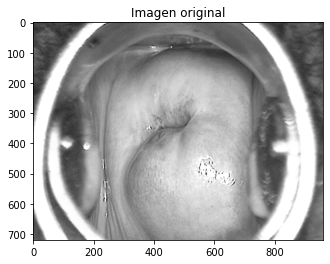

In [18]:
img = cv2.imread("AGY0.jpg", 0)
plt.imshow(img, "gray"), plt.title("Imagen original")
plt.savefig("img5.pdf")
plt.show()

In [19]:
#DWT
#Niveles 5
C = pywt.wavedec2(img, 'db5', mode='periodization', level=5)
cA5 = C[0]
(cH1, cV1, cD1) = C[-1]
(cH2, cV2, cD2) = C[-2]
(cH3, cV3, cD3) = C[-3]
(cH4, cV4, cD4) = C[-4]
(cH5, cV5, cD5) = C[-5]

#Para hallar A1 y A2
C1 = pywt.wavedec2(img, 'db5', mode='periodization', level=1)
cA1 = C1[0]
C2 = pywt.wavedec2(img, 'db5', mode='periodization', level=2)
cA2 = C2[0]
C3 = pywt.wavedec2(img, 'db5', mode='periodization', level=3)
cA3 = C3[0]
C4 = pywt.wavedec2(img, 'db5', mode='periodization', level=4)
cA4 = C4[0]

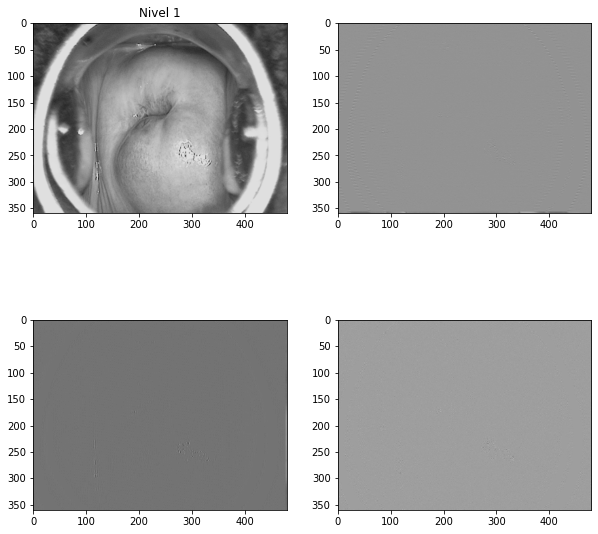

In [20]:
graficarDWT(cA1,cH1,cV1,cD1, "Nivel 1")

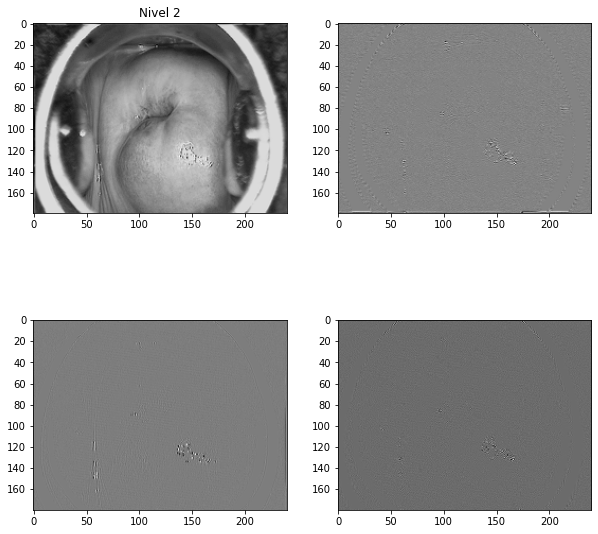

In [21]:
graficarDWT(cA2,cH2,cV2,cD2, "Nivel 2")

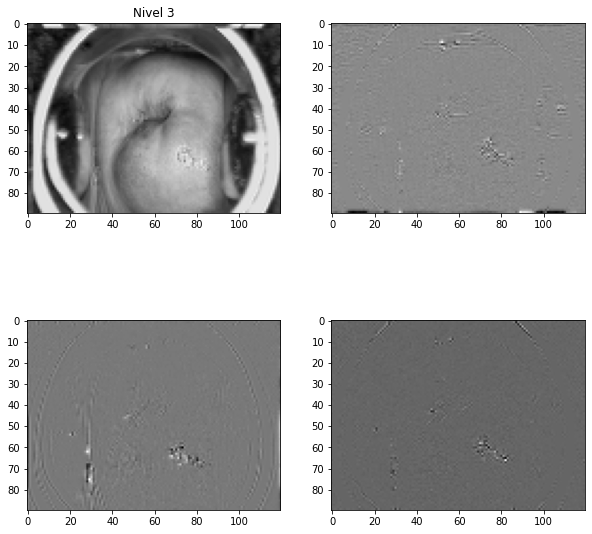

In [22]:
graficarDWT(cA3,cH3,cV3,cD3, "Nivel 3")

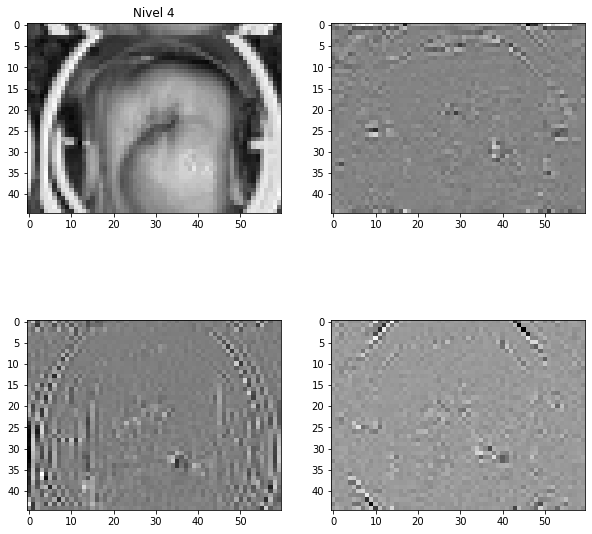

In [23]:
graficarDWT(cA4,cH4,cV4,cD4, "Nivel 4")

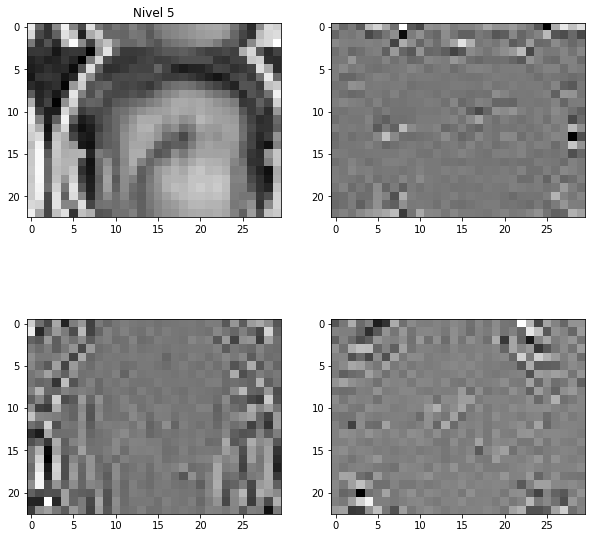

In [24]:
graficarDWT(cA5,cH5,cV5,cD5, "Nivel 5")